# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import statistics

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather["coord"]["lat"]
        city_lng = weather['coord']['lon']
        city_max_temp = weather['main']['temp_max']
        city_humidity = weather['main']['humidity']
        city_clouds = weather['clouds']['all']
        city_wind = weather['wind']['speed']
        city_country = weather['sys']['country']
        city_date = weather["dt"]
        
                

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | khambhaliya
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | kismayo
Processing Record 8 of Set 1 | altay
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | nova sintra
Processing Record 11 of Set 1 | mahdia
Processing Record 12 of Set 1 | itoman
Processing Record 13 of Set 1 | sindirgi
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | gwadar
Processing Record 16 of Set 1 | tralee
Processing Record 17 of Set 1 | praia da vitoria
Processing Record 18 of Set 1 | harsin
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | conde
Processing Record 21 of Set 1 | taiohae
City not found. Skipping...
Processing Record 22 of Set 1 |

Processing Record 39 of Set 4 | okha
Processing Record 40 of Set 4 | saint-joseph
Processing Record 41 of Set 4 | pathein
Processing Record 42 of Set 4 | port lincoln
Processing Record 43 of Set 4 | namdrik
Processing Record 44 of Set 4 | hermanus
Processing Record 45 of Set 4 | tromso
Processing Record 46 of Set 4 | kapuskasing
Processing Record 47 of Set 4 | masaka
Processing Record 48 of Set 4 | sola
Processing Record 49 of Set 4 | afaahiti
Processing Record 0 of Set 5 | ishigaki
Processing Record 1 of Set 5 | kirkuk
Processing Record 2 of Set 5 | crane
Processing Record 3 of Set 5 | mata-utu
Processing Record 4 of Set 5 | marsa alam
Processing Record 5 of Set 5 | port elizabeth
Processing Record 6 of Set 5 | melegnano
Processing Record 7 of Set 5 | skhirate
Processing Record 8 of Set 5 | yaren
Processing Record 9 of Set 5 | lewistown
Processing Record 10 of Set 5 | buala
Processing Record 11 of Set 5 | mankachar
Processing Record 12 of Set 5 | flin flon
Processing Record 13 of Set 

Processing Record 34 of Set 8 | phan rang-thap cham
Processing Record 35 of Set 8 | totness
Processing Record 36 of Set 8 | happy valley-goose bay
Processing Record 37 of Set 8 | laguna
Processing Record 38 of Set 8 | acapulco de juarez
Processing Record 39 of Set 8 | kalabo
Processing Record 40 of Set 8 | san jose village
City not found. Skipping...
Processing Record 41 of Set 8 | torghay
Processing Record 42 of Set 8 | viana do castelo
Processing Record 43 of Set 8 | angra dos reis
Processing Record 44 of Set 8 | mammoth lakes
Processing Record 45 of Set 8 | fort mcmurray
Processing Record 46 of Set 8 | anloga
Processing Record 47 of Set 8 | synel'nykove
Processing Record 48 of Set 8 | nabire
Processing Record 49 of Set 8 | cidreira
Processing Record 0 of Set 9 | utrik
Processing Record 1 of Set 9 | lazaro cardenas
Processing Record 2 of Set 9 | cabo san lucas
Processing Record 3 of Set 9 | chegdomyn
Processing Record 4 of Set 9 | hanceville
Processing Record 5 of Set 9 | verkhnevily

Processing Record 23 of Set 12 | tadine
Processing Record 24 of Set 12 | kannur
Processing Record 25 of Set 12 | along
Processing Record 26 of Set 12 | bonthe
Processing Record 27 of Set 12 | taroa
Processing Record 28 of Set 12 | kolonia town
Processing Record 29 of Set 12 | fisterra
Processing Record 30 of Set 12 | demre
Processing Record 31 of Set 12 | shambu
Processing Record 32 of Set 12 | goz beida
Processing Record 33 of Set 12 | kalat
Processing Record 34 of Set 12 | vernon
Processing Record 35 of Set 12 | dahanu
Processing Record 36 of Set 12 | thunder bay
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,8.23,90,100,0.89,NZ,1689426388
1,blackmans bay,-43.0167,147.3167,9.85,75,94,7.32,AU,1689426388
2,georgetown,5.4112,100.3354,29.99,72,20,1.03,MY,1689426327
3,qaqortoq,60.7167,-46.0333,5.56,91,100,4.10,GL,1689426159
4,khambhaliya,22.2072,69.6683,30.30,64,57,8.63,IN,1689426390


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
#city_data_df.to_csv("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
#city_data_df = pd.read_csv("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,90,100,0.89,NZ,1689426388
1,blackmans bay,-43.0167,147.3167,9.85,75,94,7.32,AU,1689426388
2,georgetown,5.4112,100.3354,29.99,72,20,1.03,MY,1689426327
3,qaqortoq,60.7167,-46.0333,5.56,91,100,4.10,GL,1689426159
4,khambhaliya,22.2072,69.6683,30.30,64,57,8.63,IN,1689426390


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

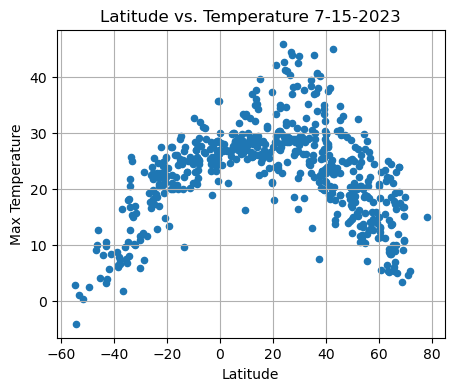

In [34]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(5,4))          


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Temperature 7-15-2023")

# Save the figure
plt.savefig("output_data/Fig1.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

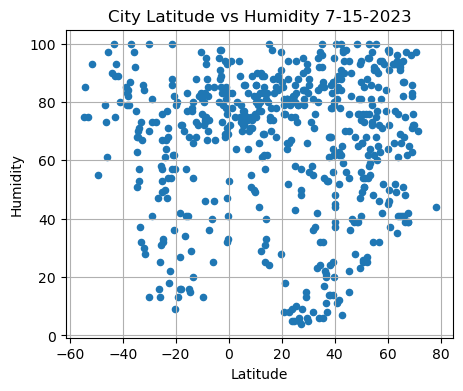

In [36]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(5,4)) 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity 7-15-2023")


# Save the figure
plt.savefig("output_data/Fig2.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

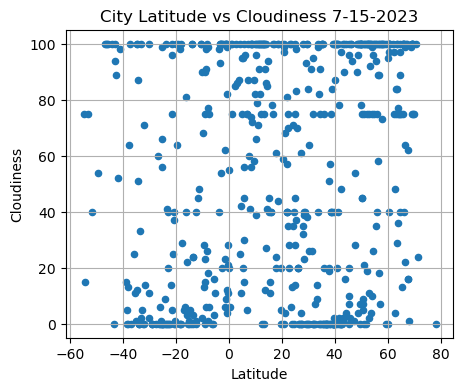

In [38]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(5,4)) 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 7-15-2023")


# Save the figure
plt.savefig("output_data/Fig3.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig3.png")



# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

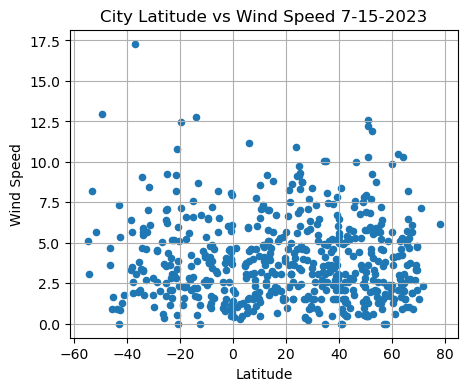

In [31]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(5,4)) 


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 7-15-2023")


# Save the figure
plt.savefig("output_data/Fig4.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_regress(x_val, y_val, c):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))       
    
    plt.plot(x_val, regress_values, "r-")
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.annotate(line_eq, c, fontsize=15,color="red")
    plt.xlabel(f"{x_val.name}")
    plt.ylabel(f"{y_val.name}")
    plt.minorticks_on()
    print(f"The correlation coefficient between x and y is {round(st.pearsonr(x_val,y_val)[0],2)}")

    
    
    
    
    
    
    


In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]



# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,georgetown,5.4112,100.3354,29.99,72,20,1.03,MY,1689426327
3,qaqortoq,60.7167,-46.0333,5.56,91,100,4.10,GL,1689426159
4,khambhaliya,22.2072,69.6683,30.30,64,57,8.63,IN,1689426390
7,altay,47.8667,88.1167,29.21,28,54,6.78,CN,1689426320
9,nova sintra,14.8667,-24.7167,22.45,80,94,3.23,CV,1689426392


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,8.23,90,100,0.89,NZ,1689426388
1,blackmans bay,-43.0167,147.3167,9.85,75,94,7.32,AU,1689426388
5,edinburgh of the seven seas,-37.0676,-12.3116,16.44,87,100,17.30,SH,1689426142
6,kismayo,-0.3582,42.5454,26.92,69,21,7.97,SO,1689426391
8,adamstown,-25.0660,-130.1015,21.96,76,66,9.25,PN,1689426391


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between x and y is -0.61


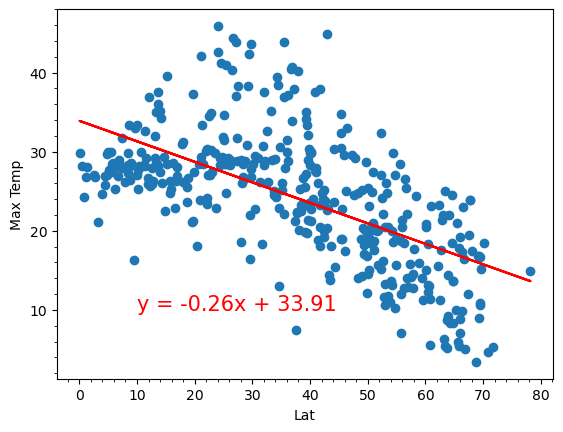

In [101]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (10, 10))





The correlation coefficient between x and y is 0.84


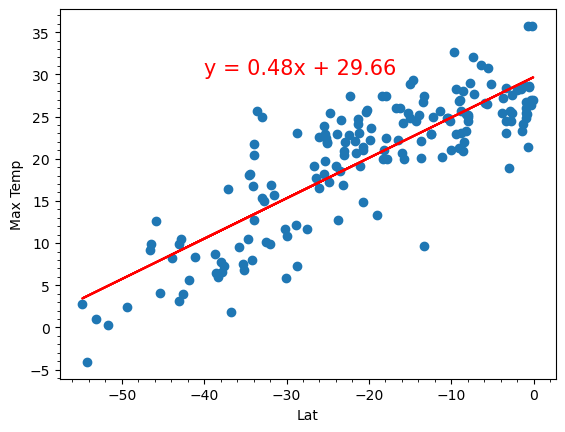

In [96]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-40, 30))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the Northern Hemishere the higher the Lat the lower the max temp. (The correlation coefficient between x and y is -0.61)
In the SouthernHemishere the lower the lat the lower the max temp. (The correlation coefficient between x and y is 0.84)

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient between x and y is -0.02


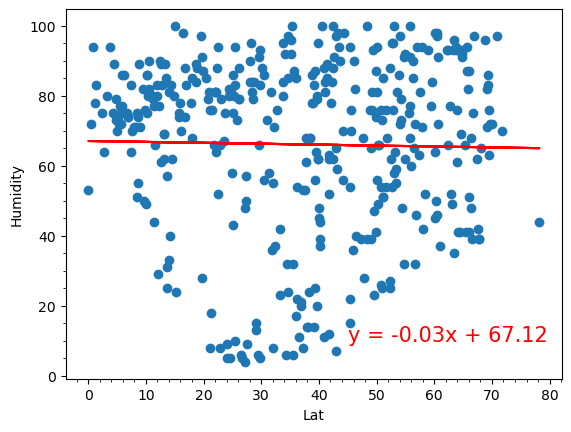

In [103]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (45, 10))


The correlation coefficient between x and y is -0.03


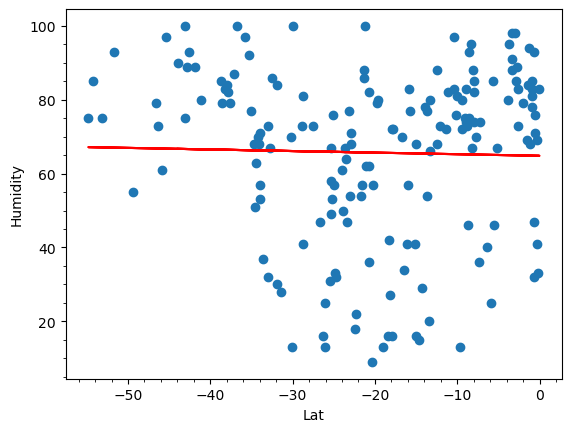

In [104]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (45, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern hemishere - The correlation coefficient between x and y is -0.02
Southern hemishere - he correlation coefficient between x and y is -0.03

### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient between x and y is 0.06


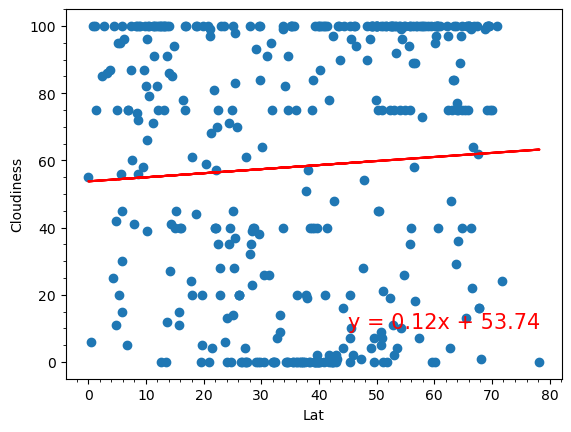

In [105]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (45, 10))



The correlation coefficient between x and y is 0.04


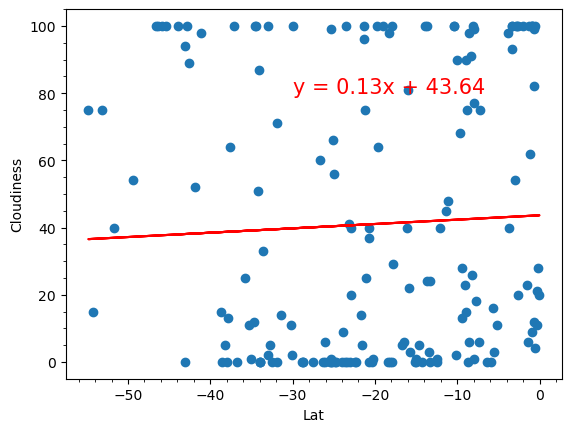

In [107]:
# Southern Hemisphere
# YOUR CODE HERE

linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-30, 80))


**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern hemisphere - The correlation coefficient between x and y is 0.06
Southern hemisphere - The correlation coefficient between x and y is 0.04

### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient between x and y is -0.0


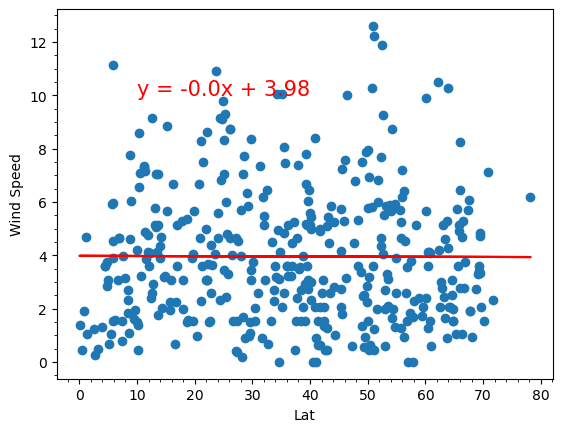

In [108]:
# Northern Hemisphere
# YOUR CODE HERE

linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10, 10))



The correlation coefficient between x and y is -0.12


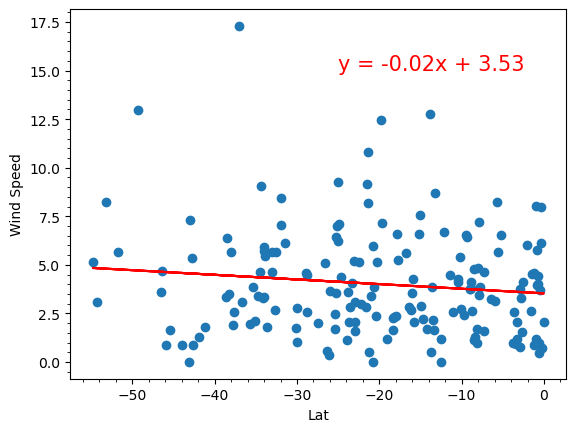

In [110]:
# Southern Hemisphere
# YOUR CODE HERE

linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-25, 15))




**Discussion about the linear relationship:** YOUR RESPONSE HERE
Northern hemishpere - The correlation coefficient between x and y is -0.0
Southern hemisphere - The correlation coefficient between x and y is -0.12